### Lab 5: Decision Tree Regression

OK, your turn. I'll set it up, but then build a decision tree model to predict car selling price. You'll also need to tune max_depth to make sure you're not overfitting your model.

Follow the ML workflow:
1. Obtain and isolate the data
2. Split the data into training & test datasets
3. Format the data for the algorithm
4. Create an initial model and train it
5. Use the test set to measure the model's performance
6. Tune the model to minimize error
7. Use the model to make new predictions

In [75]:
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### 1. Obtain and isolate the data

In [76]:
# Read data from a .csv (comma-separated-values) file in the local directory
# Adapted from: 
# https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv
df = pd.read_csv('../data/cars.csv')  # Notice the path to the data file
df.head(4)

,name,year,selling_price,km_driven,km/liter,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.00,1396.0,90.00,5.0


In [77]:
# Your code here

In [78]:
# kcolvin code:
# Pull out selling_price as the target (the value we will predict)
y = df['selling_price']
y.head(2)

0    450000
1    370000
Name: selling_price, dtype: int64

In [79]:
X = df.drop(['name','selling_price'],axis=1)
X.head(2)

,year,km_driven,km/liter,engine,max_power,seats
0,2014,145500,23.40,1248.0,74.00,5.0
1,2014,120000,21.14,1498.0,103.52,5.0


### 2. Split the data into training & test datasets

In [80]:
# Your code here

In [81]:
# kcolvin code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### 3. Format the data for the algorithm

In [82]:
# your code here

In [83]:
# kcolvin code
# Just check features for dataframes
print(type(X_train))
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


### 4. Create an initial model and train it

In [84]:
# your code here

In [85]:
# Create the model and train it
regressor = tree.DecisionTreeRegressor(max_depth = None, random_state = 42) # Full depth
# Train the model
fit_tree = regressor.fit(X_train, y_train)
fit_tree # Show hyperparameters

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

### 5. Use the test set to measure the model's performance

In [86]:
# Your code here

In [87]:
# kcolvin code
y_pred = regressor.predict(X_test)

In [88]:
# Define a function we can call later
def tree_eval(test_data,predicted_data,max_depth):
    r2 = round(r2_score(test_data, predicted_data),2)
    mse = round(mean_squared_error(y_test, y_pred),2)
    #
    print('max_depth =', max_depth)
    print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    print("MSE: ", mse)
    print("RMSE: ", round(mse**(1/2.0),3)) # Root Mean Squared Error

In [89]:
# Report the performance metrics
tree_eval(y_test,y_pred, None)

max_depth = None
Coefficient of determination: 0.96
MSE:  25190631678.31
RMSE:  158715.568


### 6. Tune the model to minimize error

In [90]:
# your code here

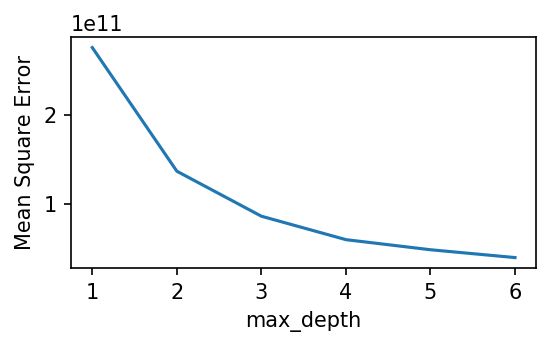

In [91]:
# kcolvin code
# Max dimensions is the same as the number of features
max_depths = np.linspace(1, 6, 6, endpoint=True)
mse_lst = []
for md in max_depths:
    regressor = tree.DecisionTreeRegressor(max_depth=md, random_state = 42)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = round(mean_squared_error(y_test, y_pred),2)
    #print(mse)
    mse_lst.append(mse)
# Plot the max_depth vs. mse
plt.figure(figsize=(4,2), dpi=150)
plt.plot(max_depths,mse_lst)
plt.xlabel("max_depth")
plt.ylabel("Mean Square Error")
plt.show()

In [92]:
# Looks like full depth is the best for our data
regressor = tree.DecisionTreeRegressor(max_depth = None, random_state = 42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
tree_eval(y_test,y_pred, None)

max_depth = None
Coefficient of determination: 0.96
MSE:  25190631678.31
RMSE:  158715.568


In [93]:
# Print the full tree, if you want to see it
text_representation = tree.export_text(regressor,feature_names = list(X.columns),show_weights = True)
#print(text_representation)

In [94]:
# This doesn't work for some reason with max_depth = None, but it does work if you create 
#     the regressor with max_value =6
# Visualize the tree
#plt.figure(figsize=(6,6), dpi=150)
#tree.plot_tree(regressor, feature_names=X.columns,filled=True)
#plt.show()

### 7. Use the model to make new predictions

In [95]:
# your code here

In [96]:
# kcolvin code
# Predict 'new' different cars selling price
#
# Recall the Features: 
#   ['year', 'km_driven', 'km/liter', 'engine', 'max_power', 'seats']
#
c1 = [2013.0, 192500.0, 22.32, 1582.0, 126.3, 5.0]
c2 = [2015.0, 9000.0, 9.4, 2179.0, 120.0, 7.0]
c3 = [2017.0, 99000.0, 13.6, 1999.0, 177.0, 4.0]
c4 = [2019.0, 256000.0, 24.0, 1120.0, 70.0, 5.0]
c5 = [2021.0, 5000.0, 36.1, 796.0, 37.0, 2.0]
#
c_lst = [c1, c2, c3, c4, c5]
#
for car in c_lst:
    print('Car features:', car)
    df = pd.DataFrame(data=car)
    pv = int(regressor.predict(df.T).item())
    print('Predicted Value in some currency:', pv , '\n')

Car features: [2013.0, 192500.0, 22.32, 1582.0, 126.3, 5.0]
Predicted Value in some currency: 522000 

Car features: [2015.0, 9000.0, 9.4, 2179.0, 120.0, 7.0]
Predicted Value in some currency: 520000 

Car features: [2017.0, 99000.0, 13.6, 1999.0, 177.0, 4.0]
Predicted Value in some currency: 3000000 

Car features: [2019.0, 256000.0, 24.0, 1120.0, 70.0, 5.0]
Predicted Value in some currency: 710000 

Car features: [2021.0, 5000.0, 36.1, 796.0, 37.0, 2.0]
Predicted Value in some currency: 66000 

